In [53]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [54]:
df = spark.read.csv('AppleStore.csv',header=True,inferSchema=True,nullValue='')

### 2.2 Describe the data

In [55]:
# Displays the content of the DataFrame to stdout
df.show()

+---+---------+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-----------------+---------------+---------------+--------+-------+
|_c0|       id|          track_name|size_bytes|currency|price|rating_count_tot|rating_count_ver|user_rating|user_rating_ver|    ver|cont_rating|      prime_genre|sup_devices.num|ipadSc_urls.num|lang.num|vpp_lic|
+---+---------+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-----------------+---------------+---------------+--------+-------+
|  1|281656475|     PAC-MAN Premium| 100788224|     USD| 3.99|           21292|              26|        4.0|            4.5|  6.3.5|         4+|            Games|             38|              5|      10|      1|
|  2|281796108|Evernote - stay o...| 158578688|     USD|  0.0|          161065|              26|        4.0|            3.5|  8.2.2|         4+|     Pro

In [56]:
#1)count the number of rows 
df.count()

7197

In [57]:
#count the number of columns 
len(df.columns)

17

In [58]:
#2) value types
df.dtypes

[('_c0', 'int'),
 ('id', 'int'),
 ('track_name', 'string'),
 ('size_bytes', 'bigint'),
 ('currency', 'string'),
 ('price', 'double'),
 ('rating_count_tot', 'int'),
 ('rating_count_ver', 'int'),
 ('user_rating', 'double'),
 ('user_rating_ver', 'double'),
 ('ver', 'string'),
 ('cont_rating', 'string'),
 ('prime_genre', 'string'),
 ('sup_devices.num', 'int'),
 ('ipadSc_urls.num', 'int'),
 ('lang.num', 'int'),
 ('vpp_lic', 'int')]

In [60]:
# Print the schema in a tree format
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- track_name: string (nullable = true)
 |-- size_bytes: long (nullable = true)
 |-- currency: string (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating: double (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- ver: string (nullable = true)
 |-- cont_rating: string (nullable = true)
 |-- prime_genre: string (nullable = true)
 |-- sup_devices.num: integer (nullable = true)
 |-- ipadSc_urls.num: integer (nullable = true)
 |-- lang.num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)



In [61]:
#3) coding schemme
df = df.withColumnRenamed('sup_devices.num','sup_devices_num')

In [62]:
df = df.withColumnRenamed('ipadSc_urls.num','ipadSc_urls_num')

In [63]:
df = df.withColumnRenamed('lang.num','lang_num')

In [110]:
#Import pandas 
import pandas as pd
pd = df.toPandas()
pd.head()

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,Dictionary.com Dictionary & Thesaurus for iPad,165748736,USD,0.00,54175,10176,4.5,4.5,4,4+,Reference,24,5,9,1
1,"6play, TV en direct et en replay",94592000,USD,0.00,62,0,3.5,0.0,4.3.7,4+,Entertainment,37,5,1,1
2,PhotoSync – transfer and backup photos & videos,65495040,USD,2.99,4352,33,4.5,5.0,3.2,4+,Photo & Video,37,5,8,1
3,My Bowling 3D,176737280,USD,0.00,5090,6,4.0,3.5,1.12,4+,Games,37,5,1,1
4,realMyst,1043664896,USD,6.99,708,59,4.0,4.0,1.1.1,12+,Games,37,5,1,1


### 2.3 Explore the data

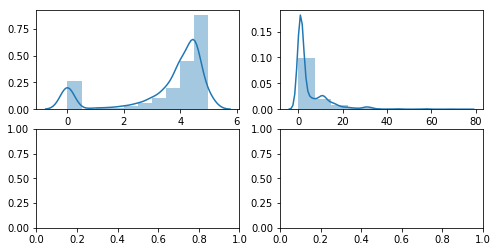

In [118]:
f, ax = plt.subplots(2,2,figsize=(8,4))
vis1 = sns.distplot(pd["user_rating"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(pd["lang_num"],bins=10, ax=ax[0][1])


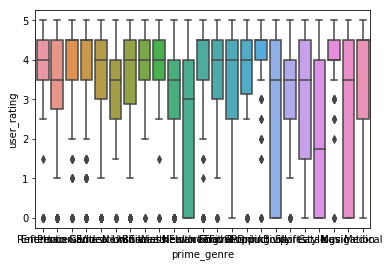

In [120]:
vis5 = sns.boxplot(data = pd, x = "prime_genre", y = "user_rating")
fig = vis5.get_figure()
fig.savefig("fig1.png")

In [13]:
df.describe('size_bytes','currency','price').show()

+-------+-------------------+--------+------------------+
|summary|         size_bytes|currency|             price|
+-------+-------------------+--------+------------------+
|  count|               7197|    7197|              7197|
|   mean| 1.99134453825066E8|    null|1.7262178685562626|
| stddev|3.592069135387029E8|    null| 5.833005786951921|
|    min|             589824|     USD|               0.0|
|    max|         4025969664|     USD|            299.99|
+-------+-------------------+--------+------------------+



In [14]:
df.describe('rating_count_tot','rating_count_ver','user_rating','user_rating_ver').show()

+-------+------------------+------------------+-----------------+-----------------+
|summary|  rating_count_tot|  rating_count_ver|      user_rating|  user_rating_ver|
+-------+------------------+------------------+-----------------+-----------------+
|  count|              7197|              7197|             7197|             7197|
|   mean|12892.907183548701| 460.3739057940809|3.526955675976101|3.253577879672086|
| stddev| 75739.40867472602|3920.4551833619757|1.517947593629884|1.809362823117772|
|    min|                 0|                 0|              0.0|              0.0|
|    max|           2974676|            177050|              5.0|              5.0|
+-------+------------------+------------------+-----------------+-----------------+



In [15]:
df.describe('ver','cont_rating','vpp_lic').show()

+-------+------------------+-----------+-------------------+
|summary|               ver|cont_rating|            vpp_lic|
+-------+------------------+-----------+-------------------+
|  count|              7197|       7197|               7197|
|   mean| 7.968864512292031|       null| 0.9930526608309017|
| stddev|107.74333834045682|       null|0.08306643356297923|
|    min|            0.0.15|        12+|                  0|
|    max|            v3.6.9|         9+|                  1|
+-------+------------------+-----------+-------------------+



In [65]:
df.describe('track_name','prime_genre').show()

+-------+--------------------+-----------+
|summary|          track_name|prime_genre|
+-------+--------------------+-----------+
|  count|                7197|       7197|
|   mean|              1824.0|       null|
| stddev|   316.7838379715733|       null|
|    min|! OH Fantastic Fr...|       Book|
|    max|                 ｗｗｗ|    Weather|
+-------+--------------------+-----------+



In [66]:
df.describe('sup_devices_num','ipadSc_urls_num','lang_num').show()

+-------+------------------+------------------+-----------------+
|summary|   sup_devices_num|   ipadSc_urls_num|         lang_num|
+-------+------------------+------------------+-----------------+
|  count|              7197|              7197|             7197|
|   mean| 37.36181742392664|3.7071001806308184| 5.43490343198555|
| stddev|3.7377152388584527|1.9860046449596336|7.919592722881359|
|    min|                 9|                 0|                0|
|    max|                47|                 5|               75|
+-------+------------------+------------------+-----------------+



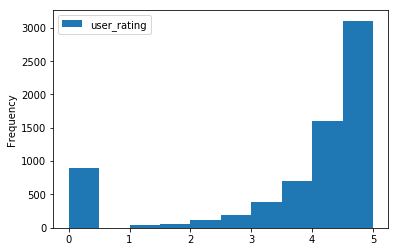

In [67]:
grouped = pd[['size_bytes','user_rating']].groupby('size_bytes').mean()
grouped.plot(kind='hist')

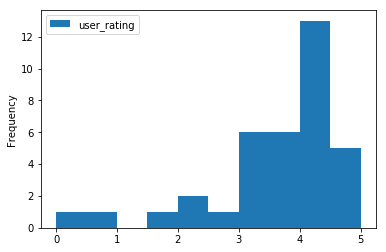

In [68]:
grouped = pd[['price','user_rating']].groupby('price').mean()
grouped.plot(kind='hist')

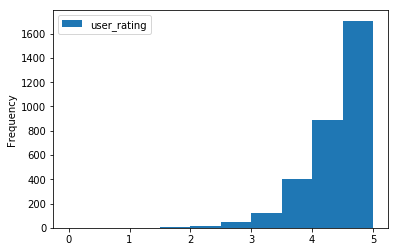

In [69]:
grouped = pd[['rating_count_tot','user_rating']].groupby('rating_count_tot').mean()
grouped.plot(kind='hist')

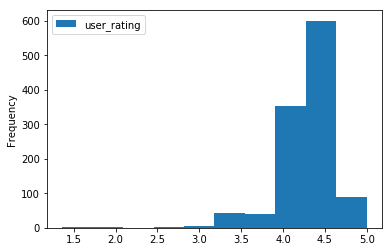

In [70]:
grouped = pd[['rating_count_ver','user_rating']].groupby('rating_count_ver').mean()
grouped.plot(kind='hist')

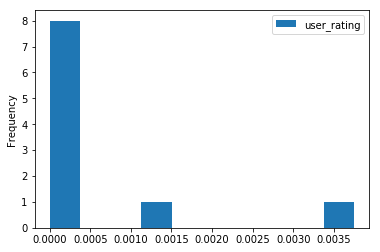

In [79]:
grouped = pd[['user_rating_ver','user_rating']].groupby('user_rating_ver').mean()
grouped.plot(kind='hist')

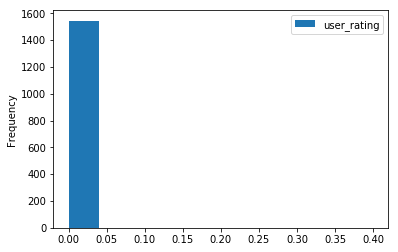

In [80]:
grouped = pd[['ver','user_rating']].groupby('ver').mean()
grouped.plot(kind='hist')

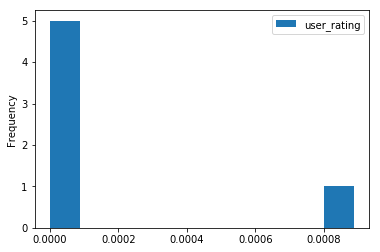

In [85]:
grouped = pd[['ipadSc_urls_num','user_rating']].groupby('ipadSc_urls_num').mean()
grouped.plot(kind='hist')

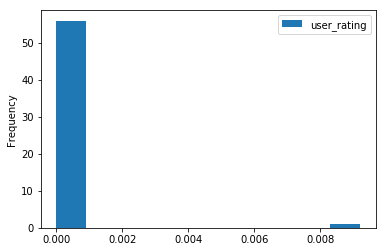

In [86]:
grouped = pd[['lang_num','user_rating']].groupby('lang_num').mean()
grouped.plot(kind='hist')

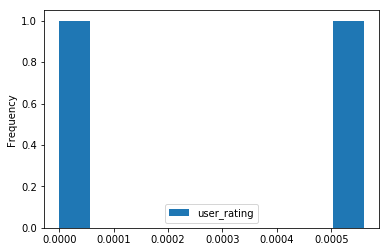

In [87]:
grouped = pd[['vpp_lic','user_rating']].groupby('vpp_lic').mean()
grouped.plot(kind='hist')

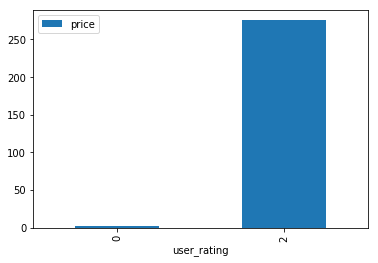

In [88]:
pd['user_rating'] = pd['price'].map(lambda x: int(str(int(x)).zfill(4)[:2]))
grouped =pd[['user_rating', 'price']].groupby('user_rating').mean()

# plot average delays by hour of day
grouped.plot(kind='bar')

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
import warnings
warnings.filterwarnings("ignore")

In [91]:
pd.describe()

,_c0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,0.000556,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,0.033338,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,0.000000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,0.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,0.000000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,2.000000,5.000000,47.000000,5.000000,75.000000,1.000000


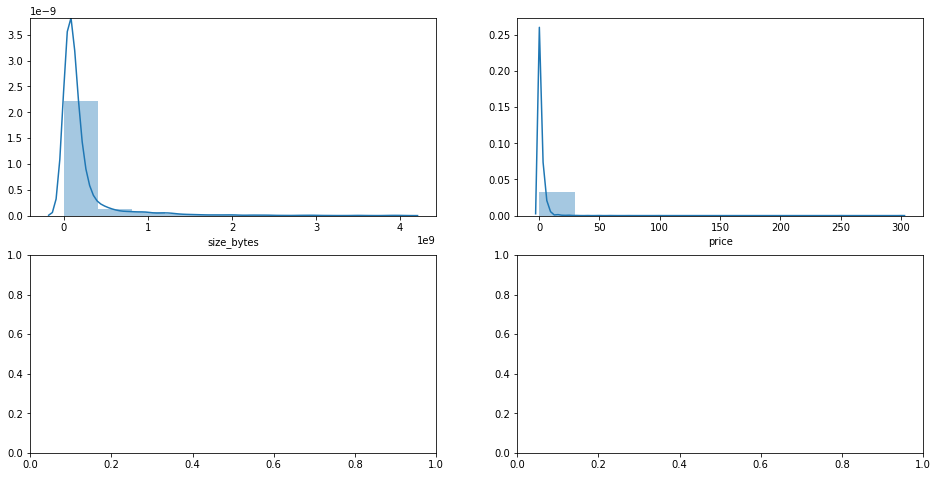

In [92]:
#https://towardsdatascience.com/visualize-world-trends-using-seaborn-in-python-2e563e7d35da
f, ax = plt.subplots(2,2,figsize=(16,8))
vis1 = sns.distplot(pd["size_bytes"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(pd["price"],bins=10, ax=ax[0][1])

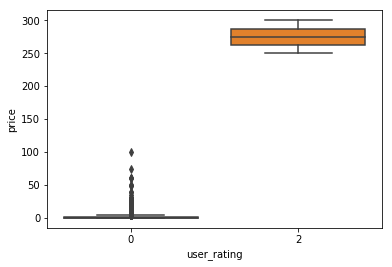

In [93]:
vis5 = sns.boxplot(data = pd, x = "user_rating", y = "price")
fig = vis5.get_figure()
fig.savefig("fig1.png")

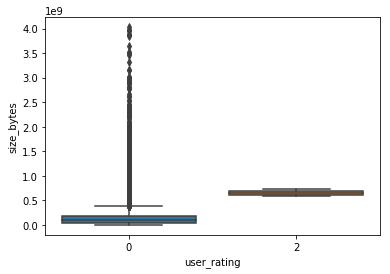

In [94]:
vis5 = sns.boxplot(data = pd, x = "user_rating", y = "size_bytes")
fig = vis5.get_figure()
fig.savefig("fig1.png")

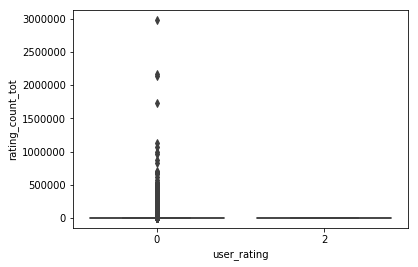

In [95]:
vis5 = sns.boxplot(data = pd, x = "user_rating", y = "rating_count_tot")
fig = vis5.get_figure()
fig.savefig("fig1.png")

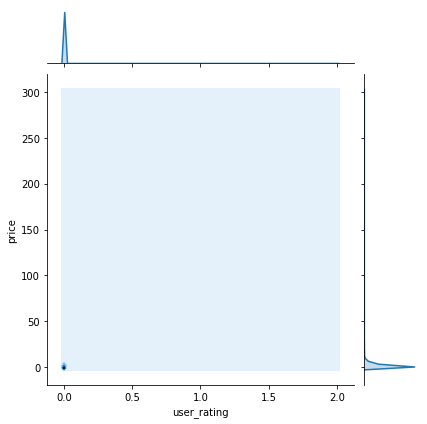

In [96]:
vis6 = sns.jointplot(data = pd, x = "user_rating", y = "price", kind='kde') #here kde means kernel density plots

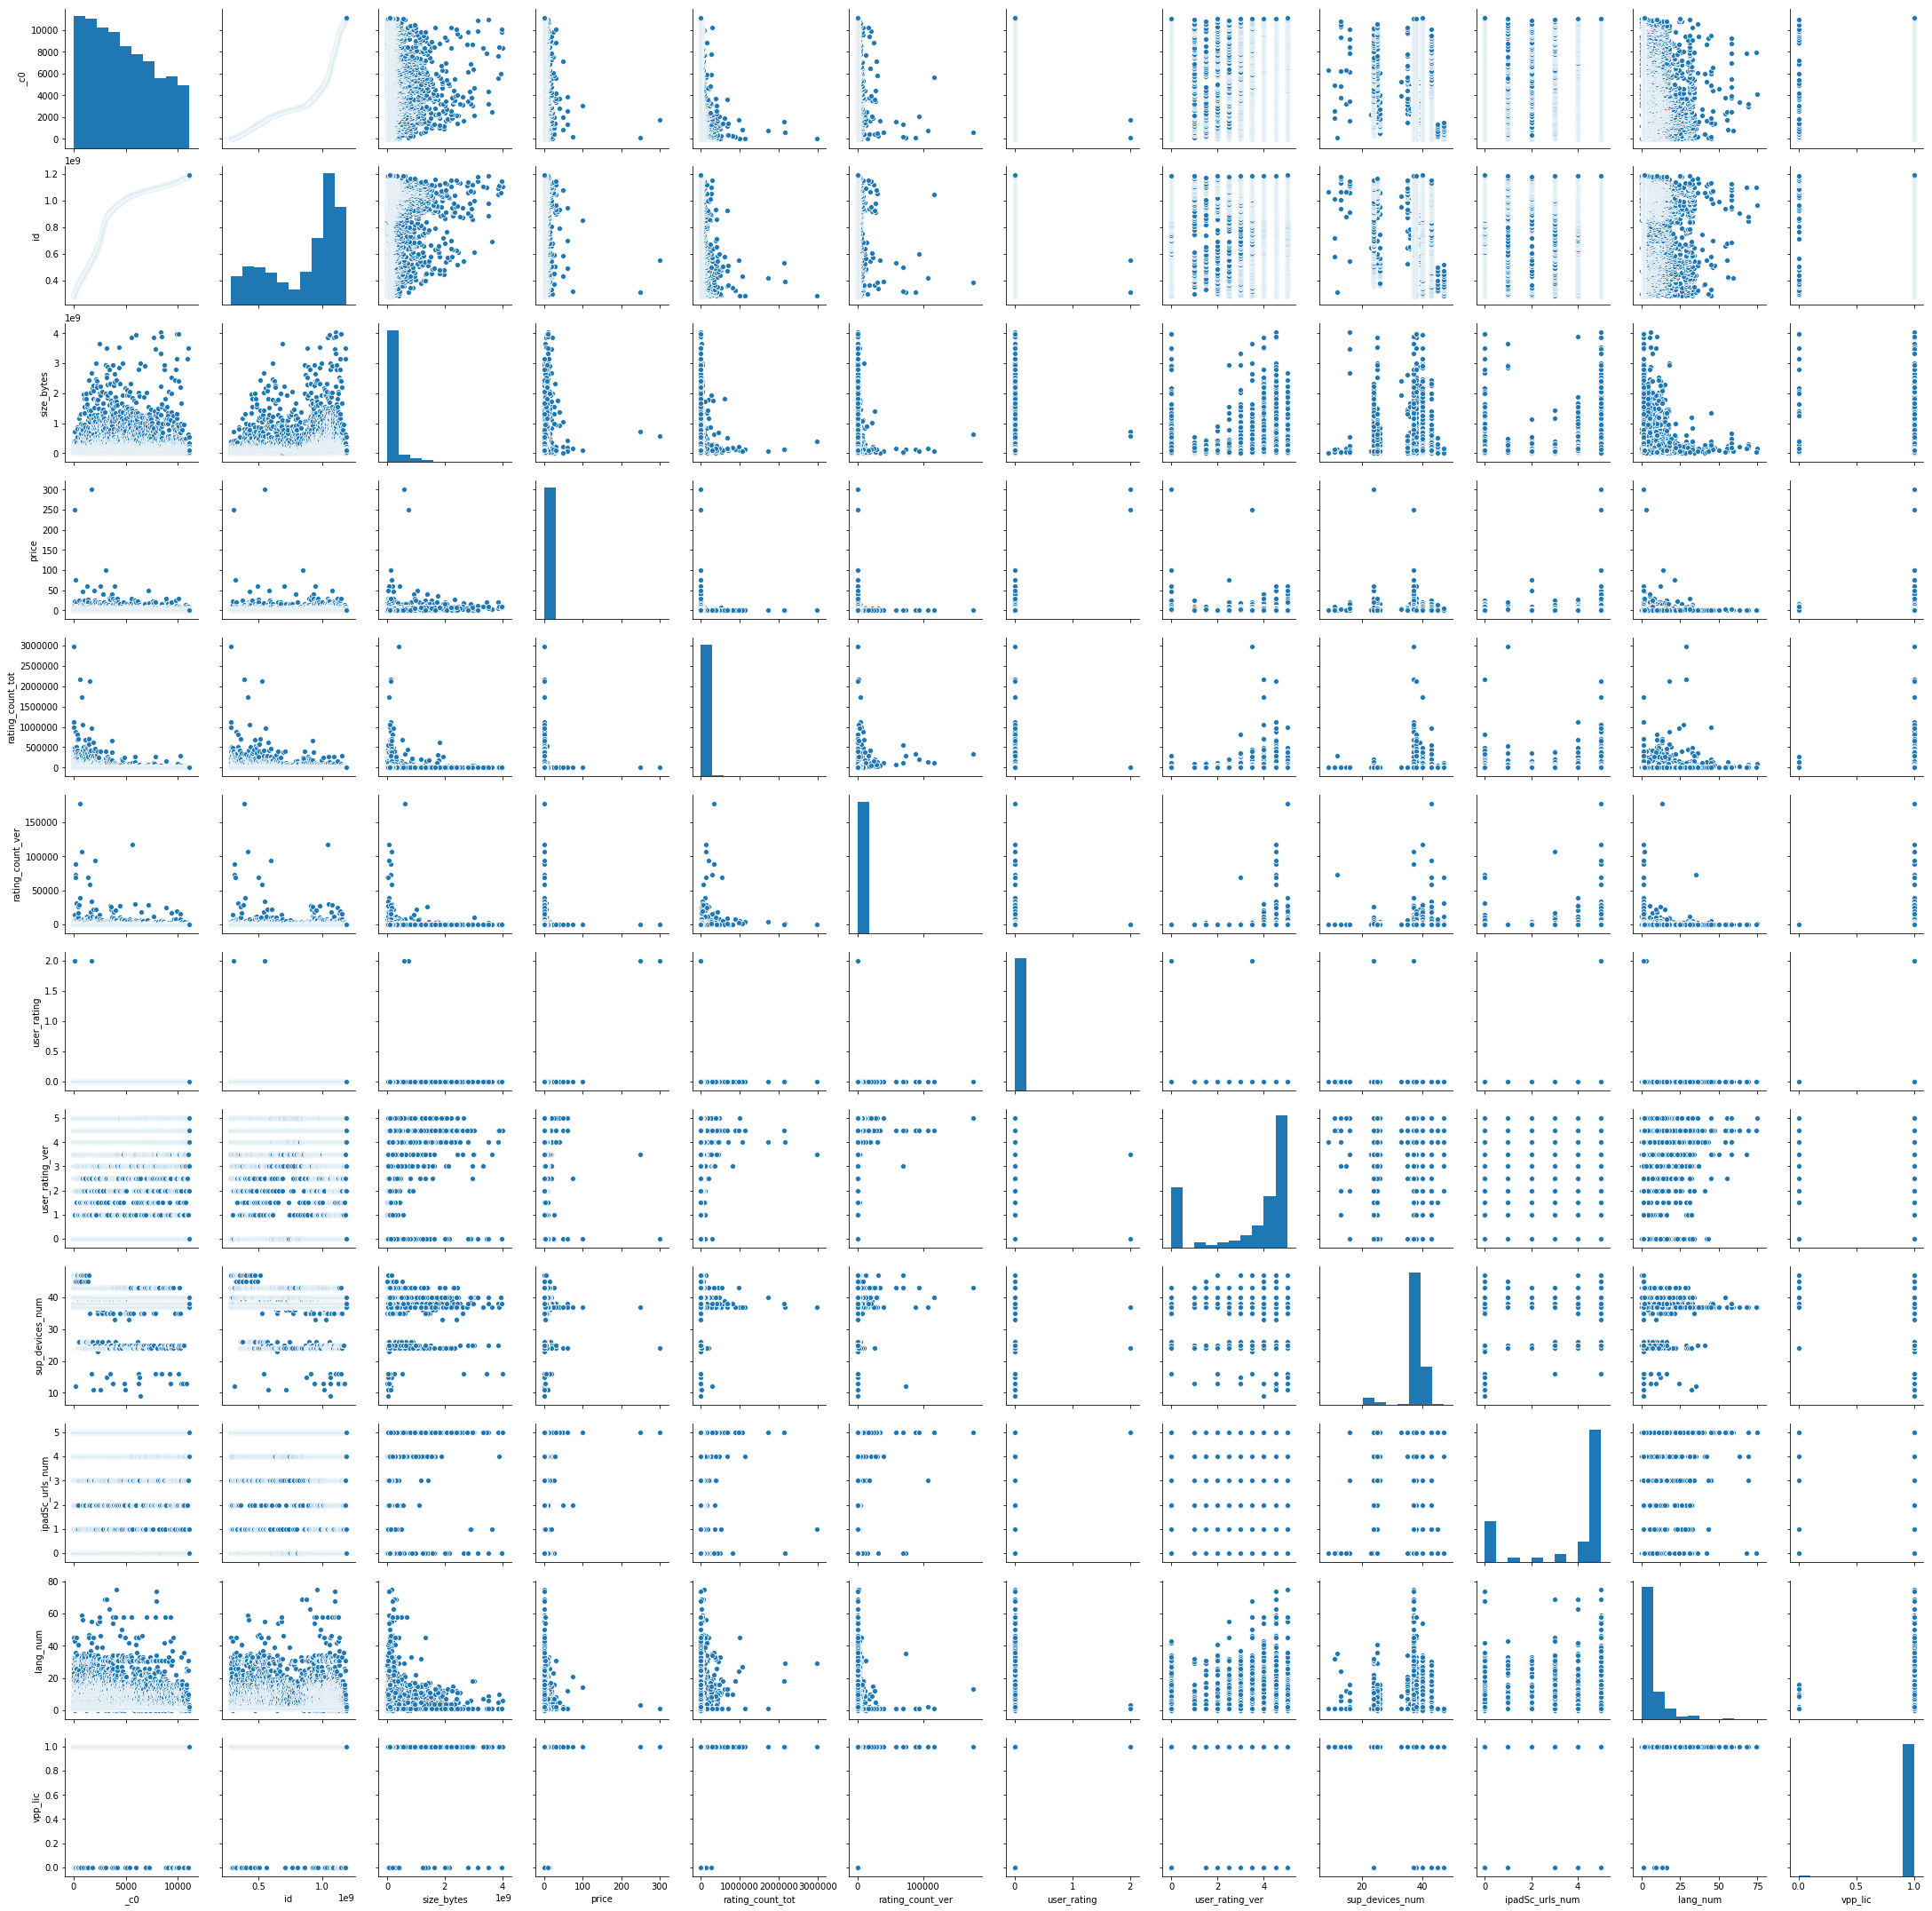

In [97]:
#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
# Create the default pairplot
sns.pairplot(pd)

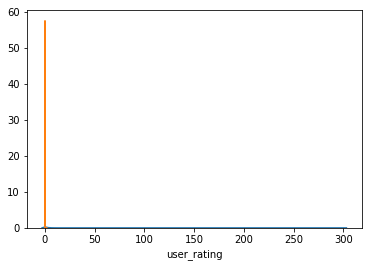

In [98]:
data=pd
sns.distplot(data['price'])
sns.distplot(data['user_rating']);


In [99]:
# We can use group by and count to find out how many data points we have for each class in our predictor. 
df.groupby('user_rating').count().toPandas()

,user_rating,count
0,0.0,929
1,3.5,702
2,4.5,2663
3,2.5,196
4,1.0,44
5,4.0,1626
6,3.0,383
7,2.0,106
8,1.5,56
9,5.0,492


Group 

In [100]:
df.select('size_bytes','user_rating').groupBy('user_rating').mean().show()

+-----------+--------------------+----------------+
|user_rating|     avg(size_bytes)|avg(user_rating)|
+-----------+--------------------+----------------+
|        0.0|1.5454625011194834E8|             0.0|
|        3.5|2.0447049252421653E8|             3.5|
|        4.5|2.1632241603379646E8|             4.5|
|        2.5|1.2382982716836734E8|             2.5|
|        1.0| 6.311240145454545E7|             1.0|
|        4.0|2.3838793608856088E8|             4.0|
|        3.0|1.6941689009660575E8|             3.0|
|        2.0| 8.878507389622642E7|             2.0|
|        1.5|      6.3979661125E7|             1.5|
|        5.0|1.5740893199796748E8|             5.0|
+-----------+--------------------+----------------+



### 2.4 Verify the data quality

Exploring Null Values

In [101]:
def count_nulls(df):
    null_counts = []          #make an empty list to hold our results
    for col in df.dtypes:     #iterate through the column data types we saw above, e.g. ('C0', 'bigint')
        cname = col[0]        #splits out the column name, e.g. 'C0'    
        ctype = col[1]        #splits out the column type, e.g. 'bigint'
        if ctype != 'string': #skip processing string columns for efficiency (can't have nulls)
            nulls = df.where( df[cname].isNull() ).count()
            result = tuple([cname, nulls])  #new tuple, (column name, null count)
            null_counts.append(result)      #put the new tuple in our result list
    return null_counts

null_counts = count_nulls(df)

In [102]:
null_counts

[('_c0', 0),
 ('id', 0),
 ('size_bytes', 0),
 ('price', 0),
 ('rating_count_tot', 0),
 ('rating_count_ver', 0),
 ('user_rating', 0),
 ('user_rating_ver', 0),
 ('sup_devices_num', 0),
 ('ipadSc_urls_num', 0),
 ('lang_num', 0),
 ('vpp_lic', 0)]

## Step 3. Data Preparation

### 3.1 Select the data

In [103]:
#exclude the first column: _c0
df.drop ('_c0')
df=df.drop ('_c0')
df.show()

+---------+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-----------------+---------------+---------------+--------+-------+
|       id|          track_name|size_bytes|currency|price|rating_count_tot|rating_count_ver|user_rating|user_rating_ver|    ver|cont_rating|      prime_genre|sup_devices_num|ipadSc_urls_num|lang_num|vpp_lic|
+---------+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-----------------+---------------+---------------+--------+-------+
|281656475|     PAC-MAN Premium| 100788224|     USD| 3.99|           21292|              26|        4.0|            4.5|  6.3.5|         4+|            Games|             38|              5|      10|      1|
|281796108|Evernote - stay o...| 158578688|     USD|  0.0|          161065|              26|        4.0|            3.5|  8.2.2|         4+|     Productivity|          

In [104]:
#exclude id
df.drop('id').show()
df=df.drop('id')

+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-----------------+---------------+---------------+--------+-------+
|          track_name|size_bytes|currency|price|rating_count_tot|rating_count_ver|user_rating|user_rating_ver|    ver|cont_rating|      prime_genre|sup_devices_num|ipadSc_urls_num|lang_num|vpp_lic|
+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-----------------+---------------+---------------+--------+-------+
|     PAC-MAN Premium| 100788224|     USD| 3.99|           21292|              26|        4.0|            4.5|  6.3.5|         4+|            Games|             38|              5|      10|      1|
|Evernote - stay o...| 158578688|     USD|  0.0|          161065|              26|        4.0|            3.5|  8.2.2|         4+|     Productivity|             37|              5|      23|      1|
|WeatherBu

### 3.2 Clean the data

In [105]:
#1) remove the whole role if there is missing data. There is no missing data as shown above.
#2) remove duplicate row
df.dropDuplicates().show()

+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-------------+---------------+---------------+--------+-------+
|          track_name|size_bytes|currency|price|rating_count_tot|rating_count_ver|user_rating|user_rating_ver|    ver|cont_rating|  prime_genre|sup_devices_num|ipadSc_urls_num|lang_num|vpp_lic|
+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-------------+---------------+---------------+--------+-------+
|Dictionary.com Di...| 165748736|     USD|  0.0|           54175|           10176|        4.5|            4.5|      4|         4+|    Reference|             24|              5|       9|      1|
|6play, TV en dire...|  94592000|     USD|  0.0|              62|               0|        3.5|            0.0|  4.3.7|         4+|Entertainment|             37|              5|       1|      1|
|PhotoSync – trans...|  654950

### 3.3 Construct the data

In [106]:
df = df.drop ('_c0').dropDuplicates()


## Step 4. Data Transformation

### 4.1 Reduce the data (correlation,select)

##### 1) Correlation

In [107]:
pd = df.toPandas()

In [108]:
pd.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
size_bytes,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418
price,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460
user_rating,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094
sup_devices_num,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109
ipadSc_urls_num,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901
lang_num,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,0.088378,1.000000,0.032477
vpp_lic,-0.150418,-0.029942,-0.000982,0.006460,0.069816,0.050094,-0.037109,0.071901,0.032477,1.000000


###### 2) Select relevant features

In [109]:
#According to the oorrelation above,select the features which are related to the predictor
#the variable "id" and "sup_device_num" is dropped because the correlation is negative.
df=df.select('size_bytes','price','rating_count_tot','rating_count_ver','user_rating','user_rating_ver','sup_device_num')


AnalysisException: "cannot resolve '`sup_device_num`' given input columns: [lang_num, track_name, rating_count_tot, ver, vpp_lic, ipadSc_urls_num, currency, sup_devices_num, size_bytes, rating_count_ver, user_rating_ver, prime_genre, price, user_rating, cont_rating];;\n'Project [size_bytes#1718L, price#1720, rating_count_tot#1721, rating_count_ver#1722, user_rating#1723, user_rating_ver#1724, 'sup_device_num]\n+- Aggregate [track_name#1717, size_bytes#1718L, currency#1719, price#1720, rating_count_tot#1721, rating_count_ver#1722, user_rating#1723, user_rating_ver#1724, ver#1725, cont_rating#1726, prime_genre#1727, sup_devices_num#1810, ipadSc_urls_num#1829, lang_num#1848, vpp_lic#1731], [track_name#1717, size_bytes#1718L, currency#1719, price#1720, rating_count_tot#1721, rating_count_ver#1722, user_rating#1723, user_rating_ver#1724, ver#1725, cont_rating#1726, prime_genre#1727, sup_devices_num#1810, ipadSc_urls_num#1829, lang_num#1848, vpp_lic#1731]\n   +- Project [track_name#1717, size_bytes#1718L, currency#1719, price#1720, rating_count_tot#1721, rating_count_ver#1722, user_rating#1723, user_rating_ver#1724, ver#1725, cont_rating#1726, prime_genre#1727, sup_devices_num#1810, ipadSc_urls_num#1829, lang_num#1848, vpp_lic#1731]\n      +- Project [id#1716, track_name#1717, size_bytes#1718L, currency#1719, price#1720, rating_count_tot#1721, rating_count_ver#1722, user_rating#1723, user_rating_ver#1724, ver#1725, cont_rating#1726, prime_genre#1727, sup_devices_num#1810, ipadSc_urls_num#1829, lang_num#1848, vpp_lic#1731]\n         +- Project [_c0#1715, id#1716, track_name#1717, size_bytes#1718L, currency#1719, price#1720, rating_count_tot#1721, rating_count_ver#1722, user_rating#1723, user_rating_ver#1724, ver#1725, cont_rating#1726, prime_genre#1727, sup_devices_num#1810, ipadSc_urls_num#1829, lang.num#1730 AS lang_num#1848, vpp_lic#1731]\n            +- Project [_c0#1715, id#1716, track_name#1717, size_bytes#1718L, currency#1719, price#1720, rating_count_tot#1721, rating_count_ver#1722, user_rating#1723, user_rating_ver#1724, ver#1725, cont_rating#1726, prime_genre#1727, sup_devices_num#1810, ipadSc_urls.num#1729 AS ipadSc_urls_num#1829, lang.num#1730, vpp_lic#1731]\n               +- Project [_c0#1715, id#1716, track_name#1717, size_bytes#1718L, currency#1719, price#1720, rating_count_tot#1721, rating_count_ver#1722, user_rating#1723, user_rating_ver#1724, ver#1725, cont_rating#1726, prime_genre#1727, sup_devices.num#1728 AS sup_devices_num#1810, ipadSc_urls.num#1729, lang.num#1730, vpp_lic#1731]\n                  +- Relation[_c0#1715,id#1716,track_name#1717,size_bytes#1718L,currency#1719,price#1720,rating_count_tot#1721,rating_count_ver#1722,user_rating#1723,user_rating_ver#1724,ver#1725,cont_rating#1726,prime_genre#1727,sup_devices.num#1728,ipadSc_urls.num#1729,lang.num#1730,vpp_lic#1731] csv\n"

In [ ]:
selected_df.printSchema()

### 4.2 Project the data

Pipeline

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

In [ ]:
selected_df.select('size_bytes','price','rating_count_tot','rating_count_ver').describe().show()

In [ ]:
selected_df.select('user_rating','user_rating_ver','ver','cont_rating').describe().show()

In [ ]:
selected_df.select('sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic').describe().show()

In [ ]:
selected_df.select('track_name','prime_genre').describe().show()

## Step 5. Data Mining Method Selection

## Step 6. Data Mining Algorithm Selection

### 6.3 Build/Select appropriate model(s) and choose relevant parameter(s) 

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
lr_train,lr_test = selected_df.randomSplit([0.7,0.3])
final_model = LogisticRegression()
fit_final = final_model.fit(lr_train)
